In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA        
import pandas as pd
import geopandas as gpd
import numpy as np
from geopandas.tools import sjoin
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
import shapely
from shapely.geometry import Point
import unicodedata
import pysal as ps


ModuleNotFoundError: No module named 'geopandas'

In [ ]:
data = pd.read_csv("../../../data/dim_patient_donor.csv").replace("NF", np.nan)
y = pd.read_csv("../../../data/y.csv")

In [ ]:
feat = pd.read_csv("../features_config/features_dtypes.csv")
var_continuous = feat[feat.type == 'quantitative'].features.tolist()
var_category = feat[feat.type == 'categorical'].features.tolist()

var_continuous = [ i for i in var_continuous if i in data.columns]
var_category = [ i for i in var_category if i in data.columns]

In [ ]:
y

,index,preoperative_icu
0,0.0,93.333333
1,1.0,6.666667


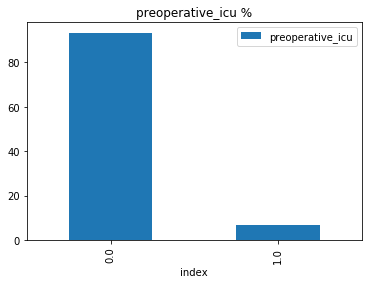

,index,preoperative_vasopressor
0,0.0,99.259259
1,1.0,0.740741


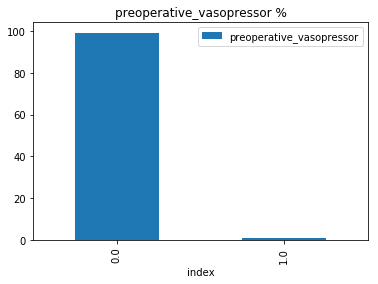

,index,preoperative_mechanical_ventilation
0,0.0,99.259259
1,1.0,0.740741


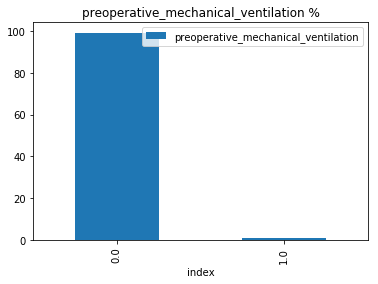

,index,super_urgence
0,0,93.333333
1,1,6.666667


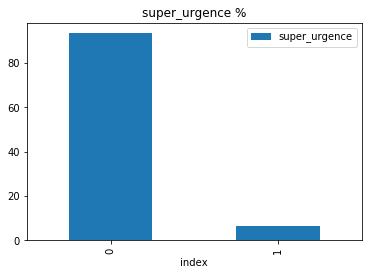

,index,other_organ_transplantation
0,0,98.518519
1,1,1.481481


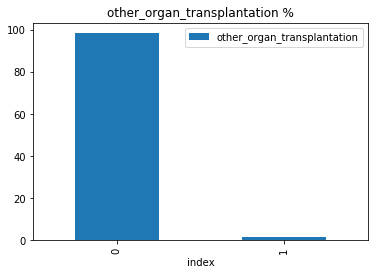

,index,pathologie
0,1,47.407407
1,2,39.259259
2,3,6.666667
3,7,2.962963
4,6,1.481481
5,5,1.481481
6,4,0.740741


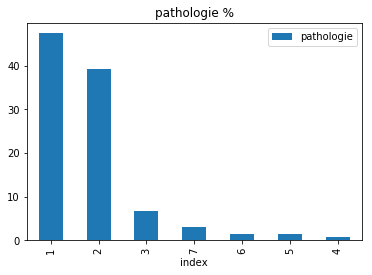

,index,retransplant
0,0,97.777778
1,1,2.222222


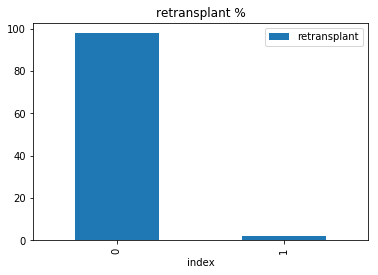

,index,transplanted_twice_during_study_period
0,0,97.777778
1,1,2.222222


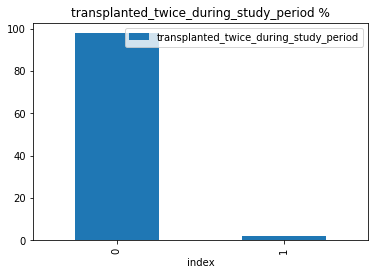

,index,thoracic_surgery_history
0,0,81.481481
1,1,18.518519


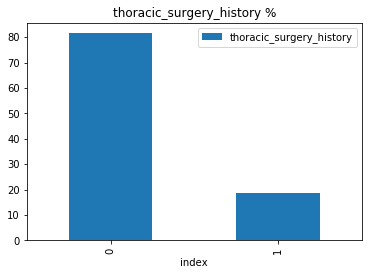

,index,preoperative_pulmonary_hypertension
0,0.0,62.222222
1,1.0,36.296296


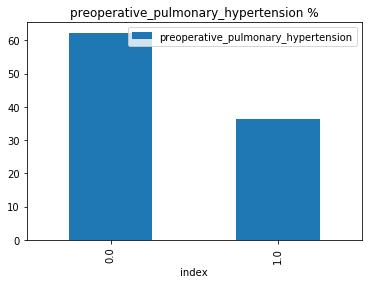

,index,plasmapherese
0,0,62.222222
1,1,37.777778


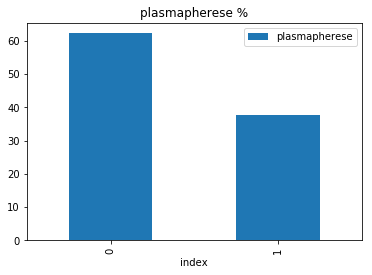

,index,pfo
0,0,90.370370
1,1,8.148148


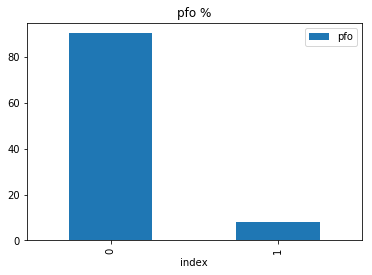

,index,preoperative_ecmo
0,0.0,98.518519
1,1.0,1.481481


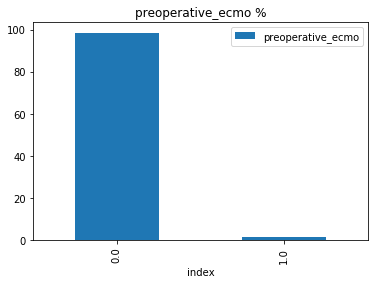

,index,postoperative_ecmo
0,0.0,100.0


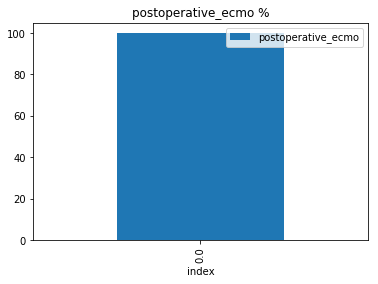

,index,only_intraoperative_ecmo
0,0.0,77.777778
1,1.0,22.222222


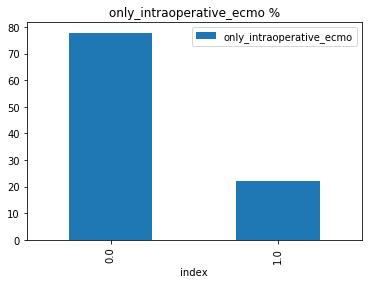

,index,ecmo_during_surgery
0,0.0,76.296296
1,1.0,23.703704


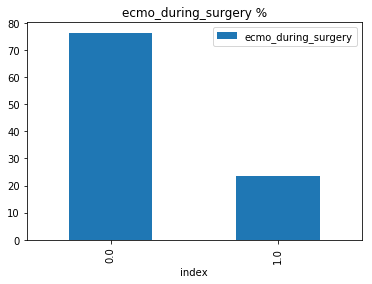

,index,cec
0,0.0,100.0


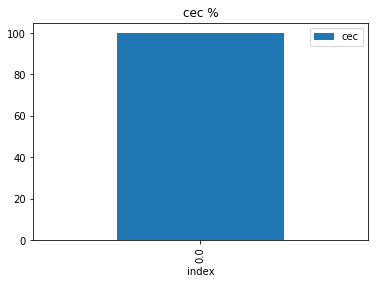

,index,cause_ecmo
0,0.0,77.037037
1,1.0,11.851852
2,3.0,4.444444
3,6.0,3.703704
4,2.0,2.222222
5,5.0,0.740741


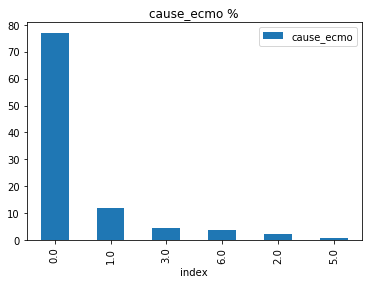

,index,pulmonary_reduction
0,0.0,81.481481
1,2.0,8.888889
2,1.0,5.925926
3,3.0,3.703704


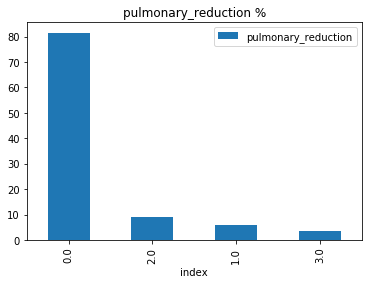

,index,adrenaline_perop
0,0.0,94.074074
1,1.0,5.925926


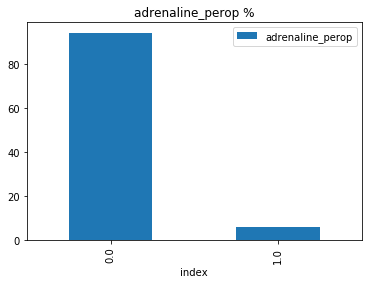

,index,no_dependence
0,0.0,100.0


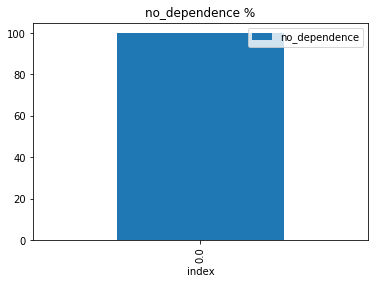

,index,cause_no_dependance
0,0.0,99.259259
1,3.0,0.740741


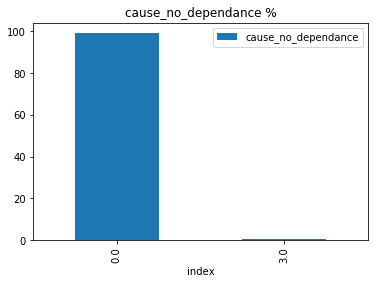

,index,adre_end_surgery
0,0.0,97.777778
1,1.0,2.222222


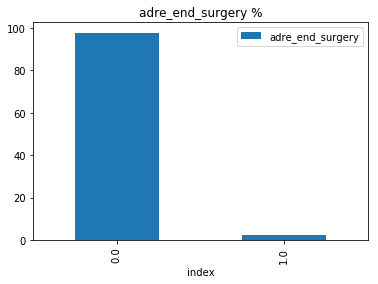

,index,aspirations_donor
0,1.0,57.037037
1,3.0,31.851852
2,2.0,8.148148
3,0.0,2.962963


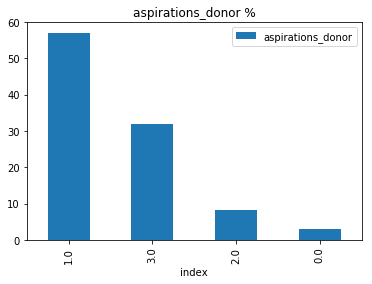

,index,sex_donor
0,1,42.962963
1,0,33.333333


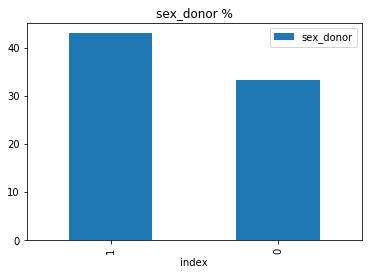

,index,rx_donor
0,1,34.074074
1,2,25.925926
2,4,22.962963
3,3,15.555556
4,5,0.740741


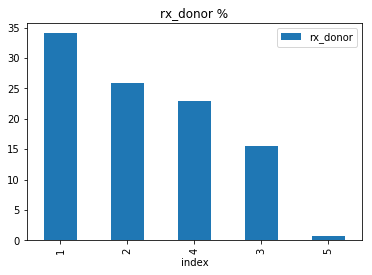

In [40]:
for i in var_category :
    
        try: 

            display(HTML("<h4> Features "+ i  + " : </h4>"))
            gb = (data[i].value_counts()/len(data)*100).reset_index().sort_values(i, ascending = False)
            display(gb)
            
            gb[0:30].plot(x = 'index', kind = 'bar')
            plt.xticks(rotation=90)
            plt.title(i + ' %')
            plt.show()
            
        except Exception as e: 
            print(e)
            print("could not plot feature {}".format(i))


,index,los_total_ventilation
0,count,135.000000
1,mean,2.622222
2,std,9.012319
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,55.000000


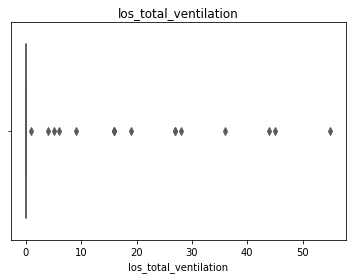

/home/vagrant/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


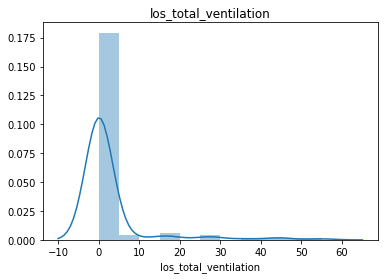

,index,time_on_waiting_liste
0,count,135.000000
1,mean,37.133333
2,std,46.338115
3,min,0.000000
4,25%,10.000000
5,50%,21.000000
6,75%,47.000000
7,max,312.000000


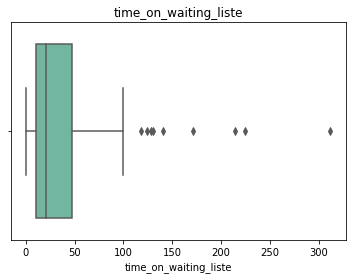

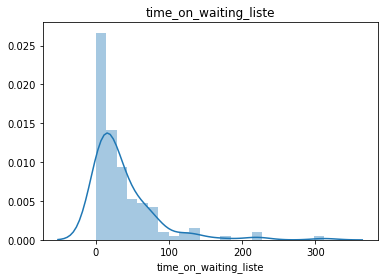

,index,first_lung_ischemic_time
0,count,134
1,unique,113
2,top,301
3,freq,3


first_lung_ischemic_time


,index,second_lung_ischemic_time
0,count,134
1,unique,113
2,top,378
3,freq,5


second_lung_ischemic_time


,index,ecmo_duration
0,count,135.000000
1,mean,429.725926
2,std,3977.000986
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,46080.000000


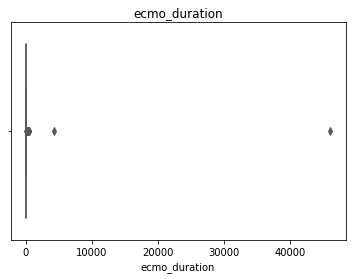

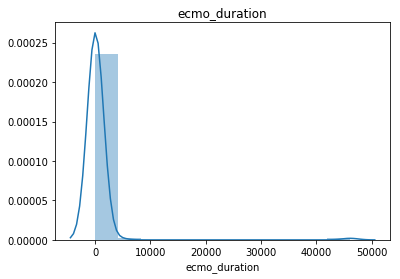

,index,prdc
0,count,135.000000
1,mean,4.118519
2,std,2.209382
3,min,0.000000
4,25%,3.000000
5,50%,4.000000
6,75%,5.000000
7,max,15.000000


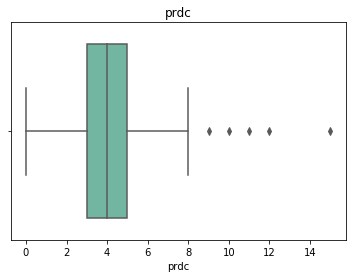

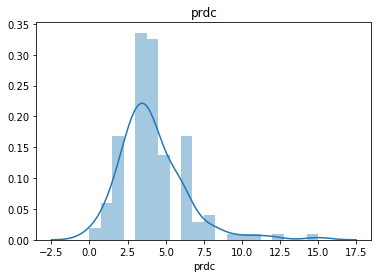

,index,fluid_support
0,count,135.000000
1,mean,2842.362963
2,std,1094.429747
3,min,800.000000
4,25%,2000.000000
5,50%,2750.000000
6,75%,3500.000000
7,max,7000.000000


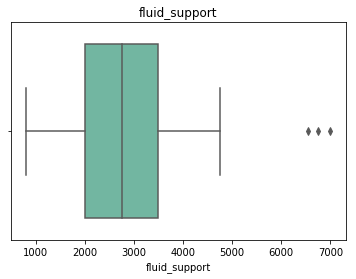

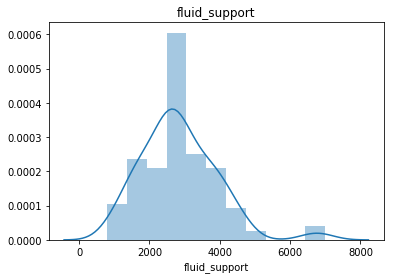

,index,estimated_blood_loss
0,count,134
1,unique,35
2,top,1000
3,freq,19


estimated_blood_loss


,index,moment_de_pose_ecmo
0,count,134.000000
1,mean,0.604478
2,std,1.382047
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,0.000000
7,max,6.000000


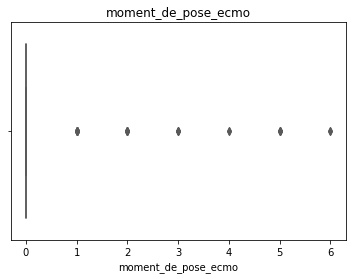

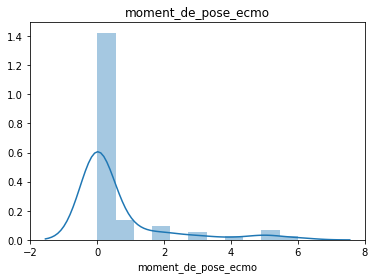

,index,age_donor
0,count,135.000000
1,mean,46.355556
2,std,17.623113
3,min,13.000000
4,25%,30.000000
5,50%,50.000000
6,75%,62.000000
7,max,74.000000


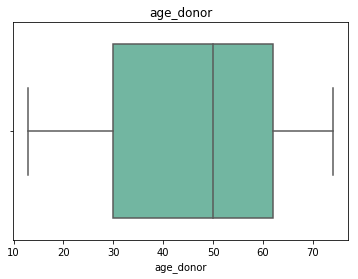

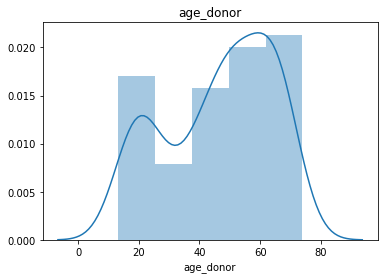

,index,bmi_donor
0,count,103
1,unique,22
2,top,24
3,freq,15


bmi_donor


,index,poids_donor
0,count,103
1,unique,44
2,top,75
3,freq,8


poids_donor


,index,taille_donor
0,count,103
1,unique,29
2,top,175
3,freq,14


taille_donor


,index,tabagisme_donor
0,count,135.000000
1,mean,4.866667
2,std,9.180446
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,5.000000
7,max,40.000000


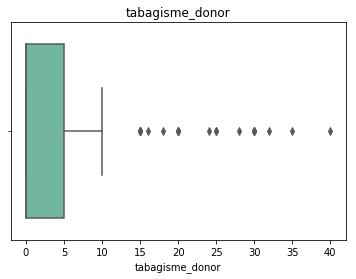

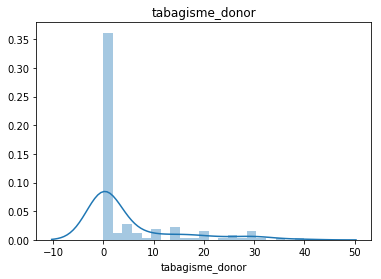

,index,pf_donor
0,count,135.000000
1,mean,379.496296
2,std,89.059252
3,min,128.000000
4,25%,311.500000
5,50%,370.000000
6,75%,448.000000
7,max,594.000000


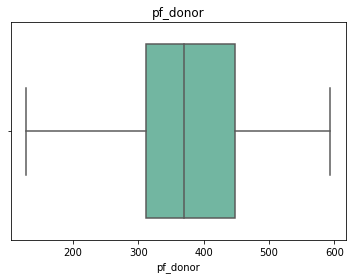

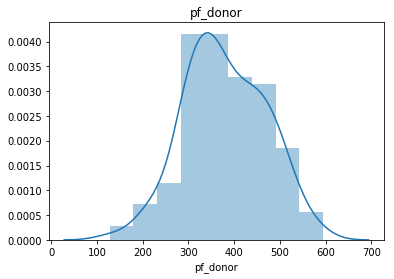

,index,oto_score
0,count,135.000000
1,mean,5.725926
2,std,2.131602
3,min,0.000000
4,25%,4.000000
5,50%,6.000000
6,75%,7.000000
7,max,10.000000


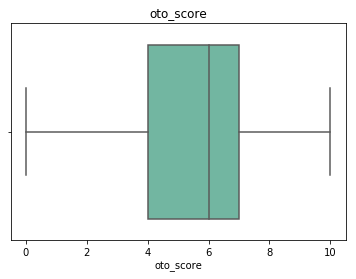

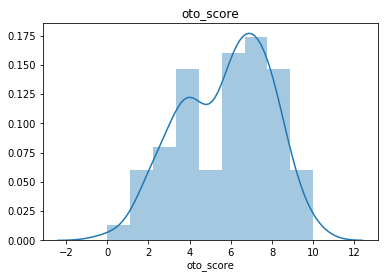

In [41]:
for i in var_continuous :
    
    try : 

        display(HTML("<h4> Feature "+ i  + " : </h4>"))
        display(data[i].describe().reset_index())

        sns.boxplot(data[i].dropna(), orient="h", palette="Set2")
        plt.title(i)
        plt.show()

        sns.distplot(data[i].dropna(),  norm_hist = True)
        plt.title(i)
        plt.show()
    except: 
        print(i)

In [42]:
def corr_mat(data):
    
    display(HTML("<h2> Correlation matrix : </h2>"))

    corr = data.astype(float).corr()


    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                                annot=True, 
                     fmt='.2f', )

    f.subplots_adjust(top=0.93)
    f.suptitle('Correlation Heatmap on numeric features', 
                  fontsize=14, 
                  fontweight='bold')

    plt.show()


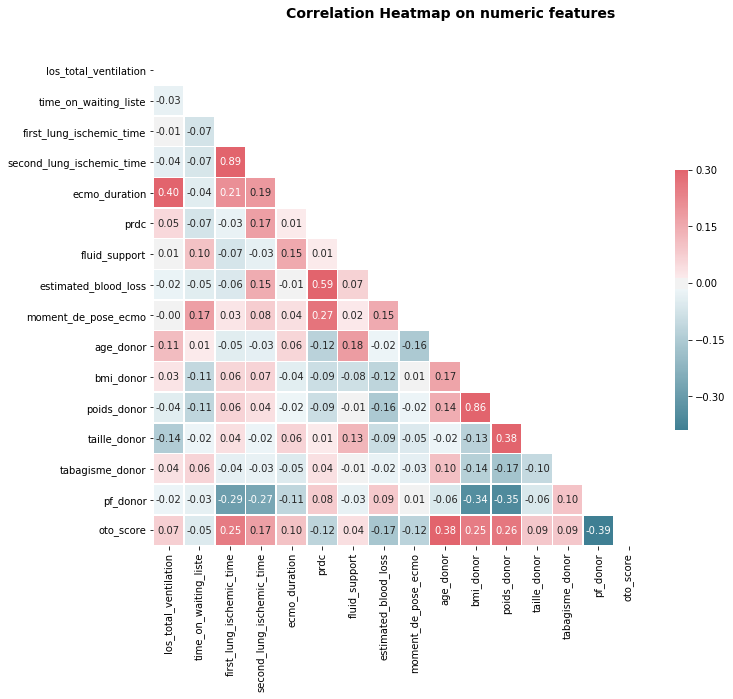

In [43]:
corr_mat(data[var_continuous])

[1 0]
1
los_total_ventilation
1
0


/home/vagrant/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


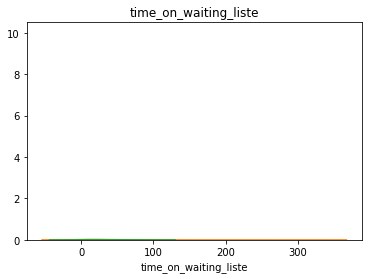

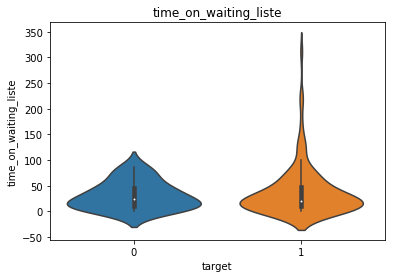

1
first_lung_ischemic_time
1
second_lung_ischemic_time
1
0


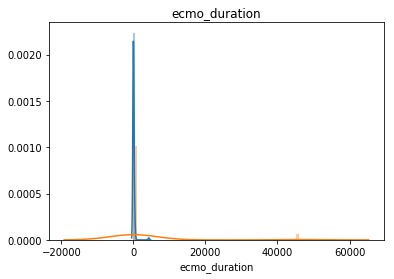

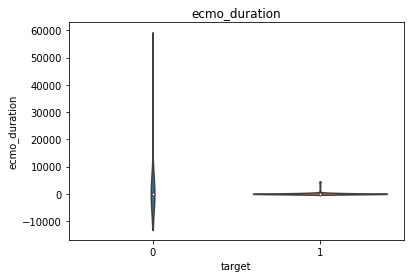

1
0


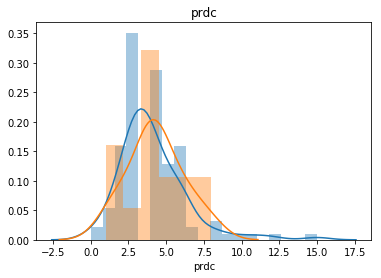

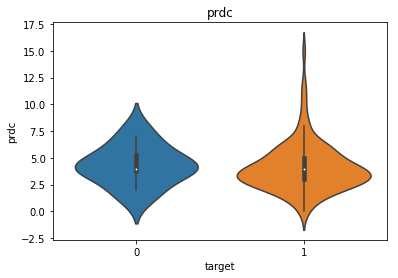

1
0


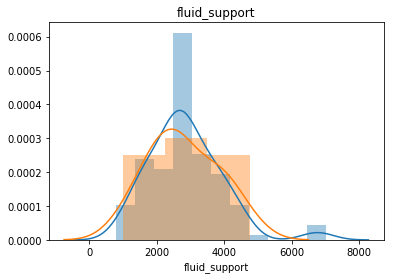

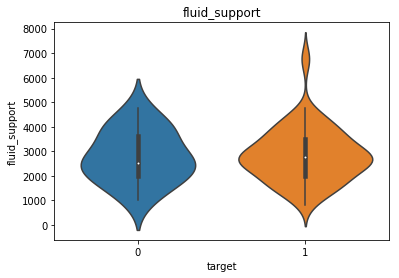

1
estimated_blood_loss
1
0


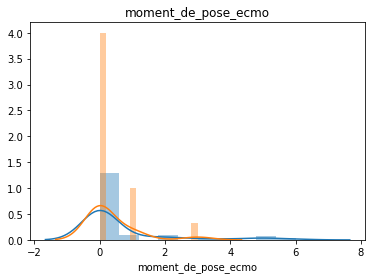

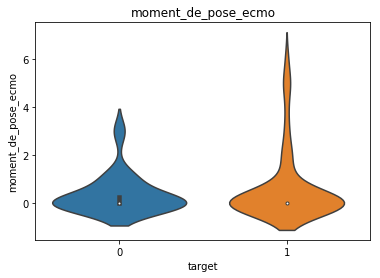

1
0


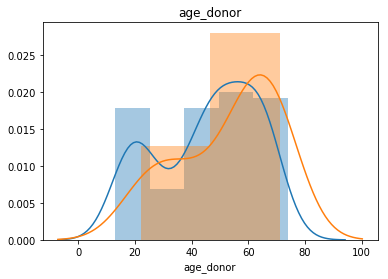

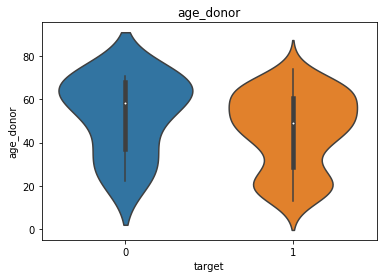

1
bmi_donor
1
poids_donor
1
taille_donor
1
0


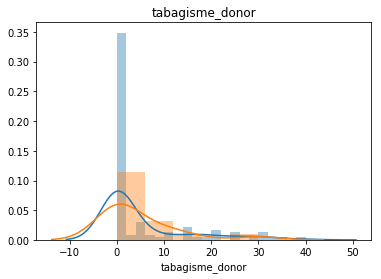

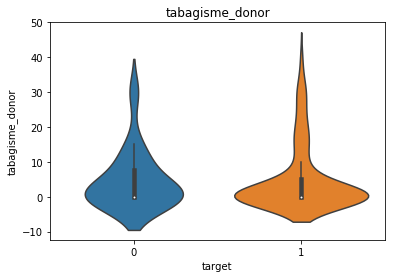

1
0


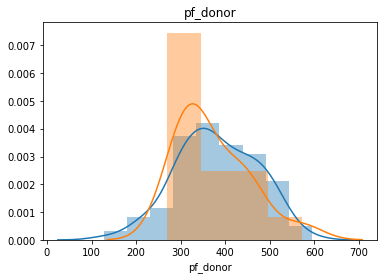

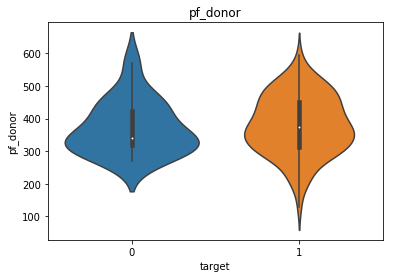

1
0


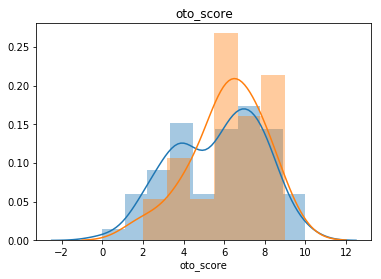

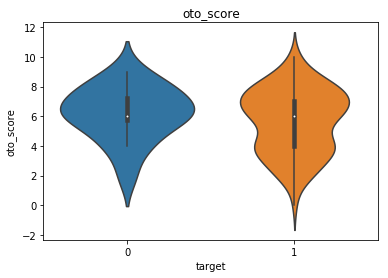

In [56]:
l = y.target.unique()
print(l)





for i in var_continuous :
    
    try : 
        for g in l :
            print(g)
            sns.distplot(data[i][y.target == g].dropna(),  norm_hist = True, label = "Label : {}".format(str(g)))


        plt.title(i)
        plt.show()

        sns.violinplot(x=y.target, y=i, data=data);
        plt.title(i)
        plt.show()
    except : 
        print(i)

preoperative_icu


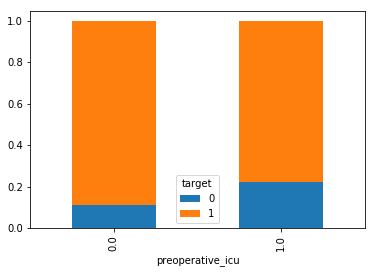

preoperative_vasopressor


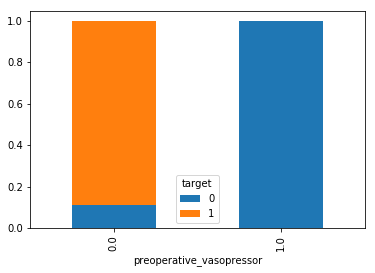

preoperative_mechanical_ventilation


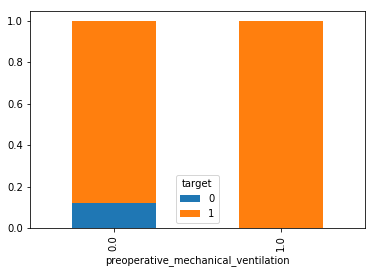

super_urgence


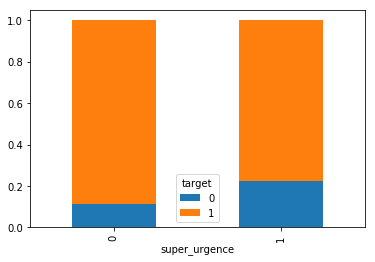

other_organ_transplantation


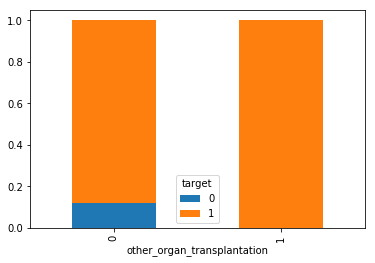

pathologie


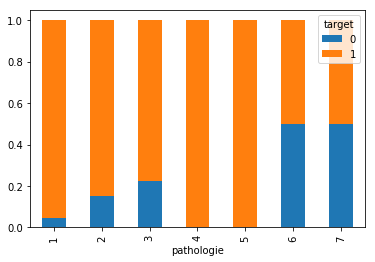

retransplant


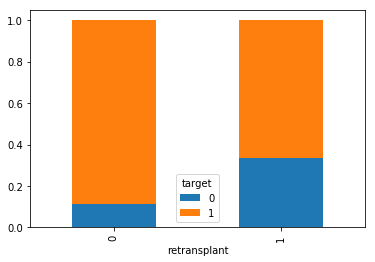

transplanted_twice_during_study_period


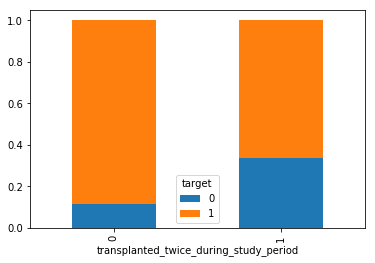

thoracic_surgery_history


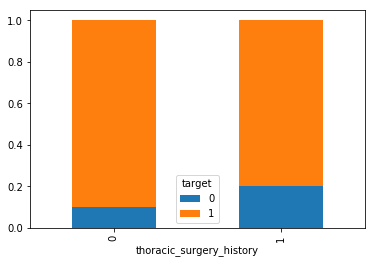

preoperative_pulmonary_hypertension


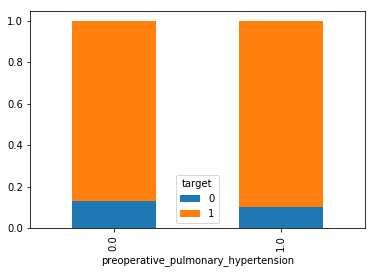

plasmapherese


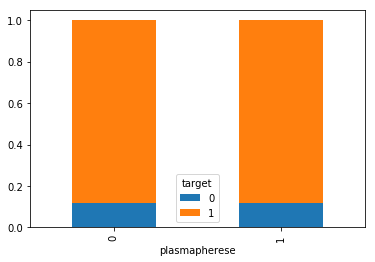

pfo


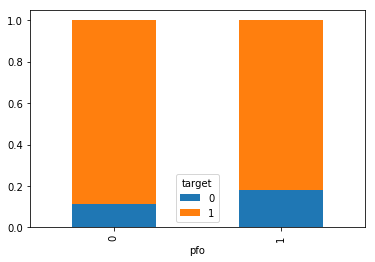

preoperative_ecmo


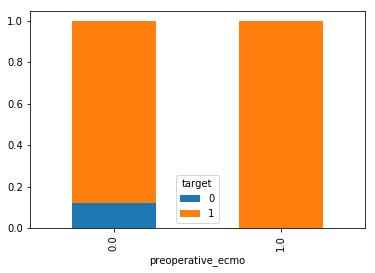

postoperative_ecmo


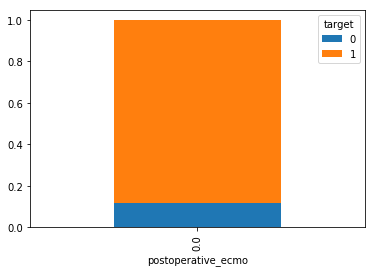

only_intraoperative_ecmo


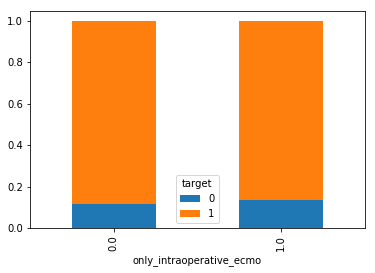

ecmo_during_surgery


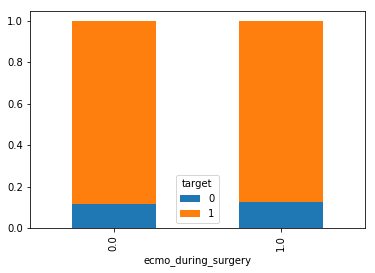

cec


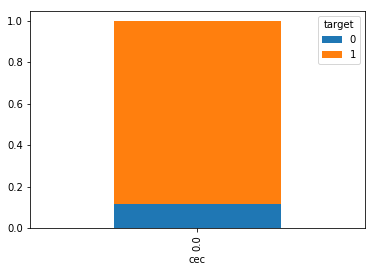

cause_ecmo


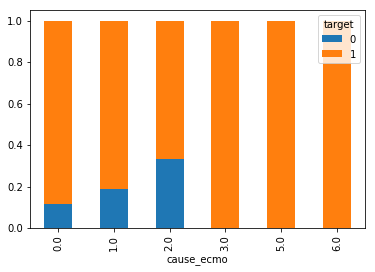

pulmonary_reduction


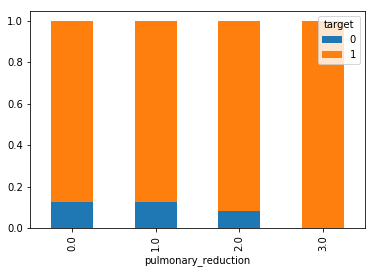

adrenaline_perop


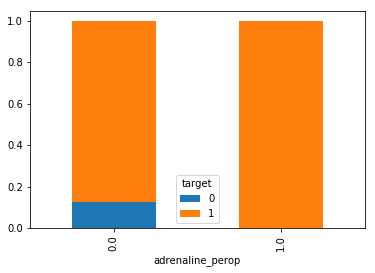

no_dependence


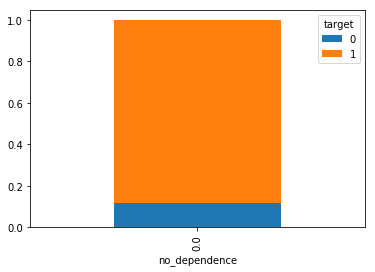

cause_no_dependance


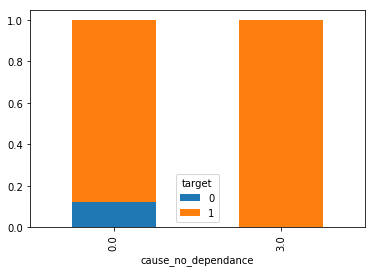

adre_end_surgery


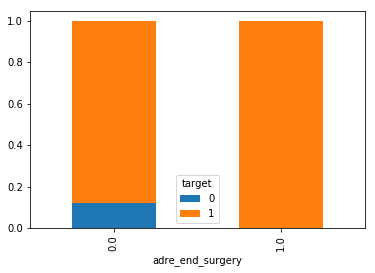

aspirations_donor


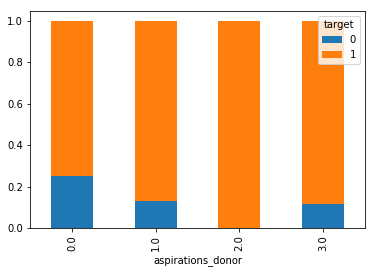

sex_donor


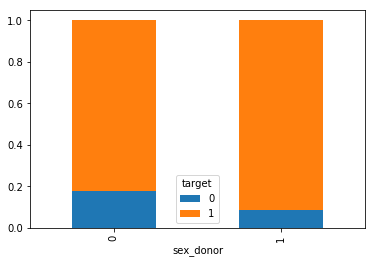

rx_donor


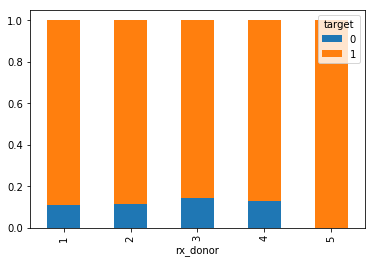

In [57]:
for i in var_category : 
    print(i)
    if len(data[i].unique()) < 30 : 
        table = pd.crosstab(data[i], y.target)
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
        plt.title('')
        plt.xlabel(i)
        plt.ylabel('')
        plt.show()